In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

plt.style.use('seaborn')
from matplotlib import rc, font_manager
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

style.use("fivethirtyeight")
style.use("seaborn-talk")
plt.rcParams['font.family'] = 'serif'

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [1]:
import os
os.listdir("../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing")

['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv', 'data5.csv', 'data6.csv']

In [3]:
for i, file in enumerate(os.listdir("../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing")):
    globals()[f'data{i+1}'] = pd.read_csv("../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing/"+file, index_col=0)

In [4]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [5]:
datas = [data1, data2, data3, data4, data5, data6]

# Data1

In [6]:
data1.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


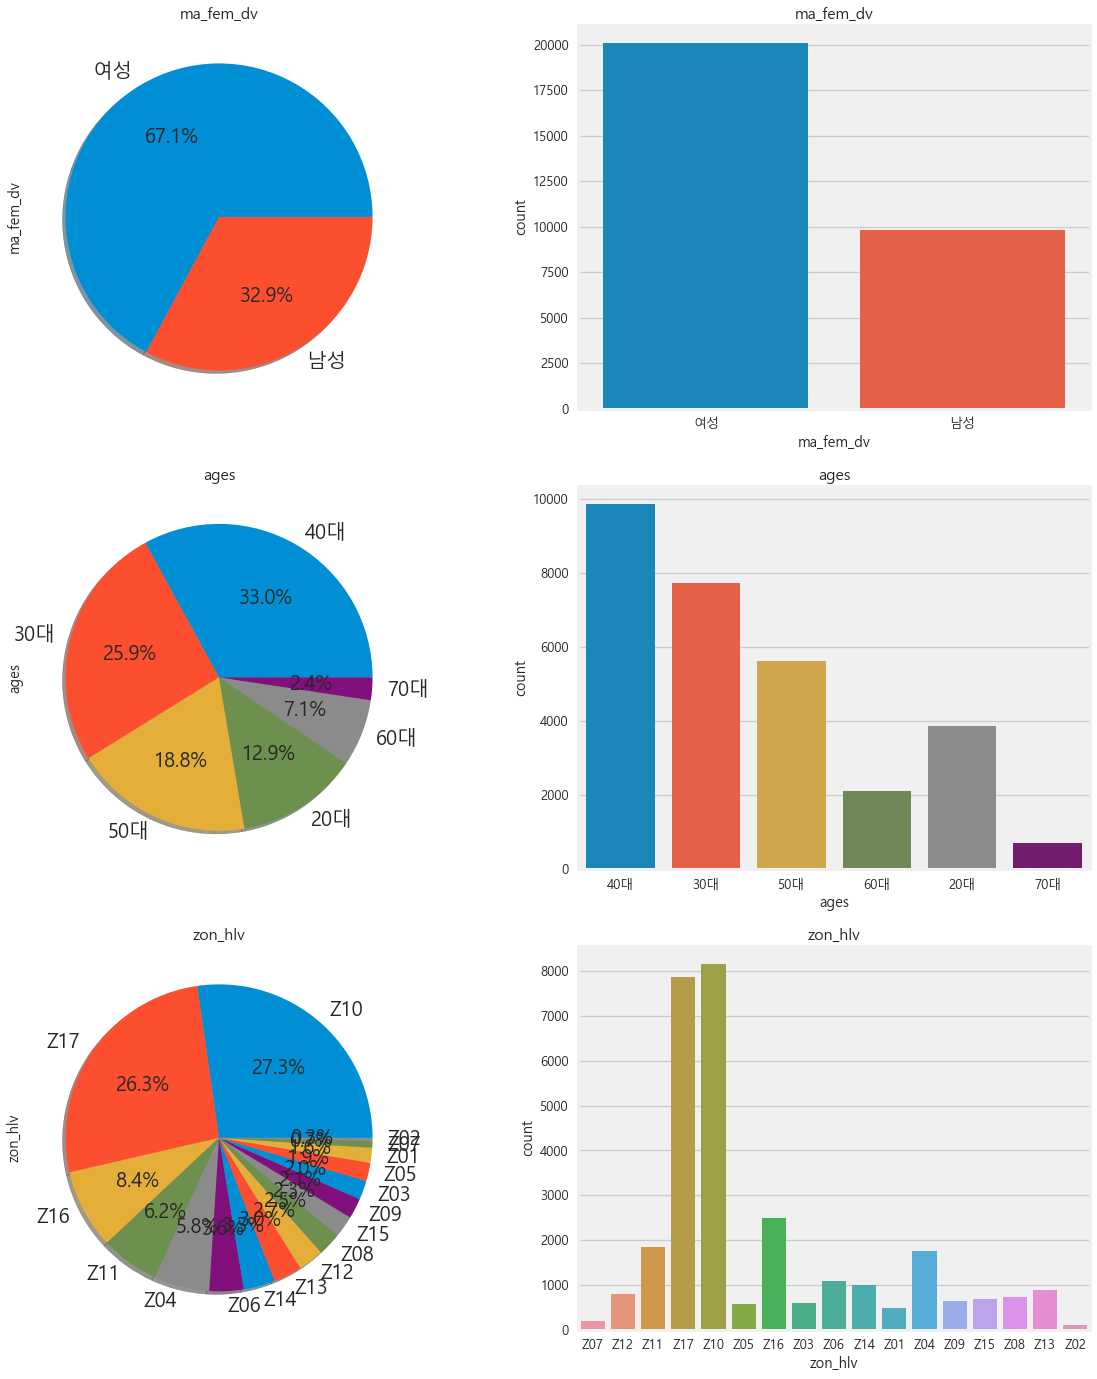

In [7]:
f, ax = plt.subplots(3, 2, figsize=(18, 24))
i, j = -1, 0
for col in data1:
    #data1[col] = data1[col].astype('category')
    if col != 'cust':
        i += 1
        data1[col].value_counts().plot.pie(autopct='%1.1f%%',
                                            ax=ax[i,j],
                                             shadow=True,
                                             fontsize=20)
        ax[i,j].set_title(col)
        
        j += 1
        sns.countplot(col, data=data1, ax=ax[i,j])
        ax[i,j].set_title(col)
        j -= 1
plt.show()

In [8]:
print('나이대별 성비')
for i in sorted(data1['ages'].unique()):
    people_num = data1.groupby(['ages', 'ma_fem_dv'])['ages'].count()[i].sum()
    print(i, round(data1.groupby(['ages', 'ma_fem_dv'])['ages'].count()[i]/people_num, 2))
    print('='*20)

나이대별 성비
20대 ma_fem_dv
남성    0.35
여성    0.65
Name: ages, dtype: float64
30대 ma_fem_dv
남성    0.35
여성    0.65
Name: ages, dtype: float64
40대 ma_fem_dv
남성    0.32
여성    0.68
Name: ages, dtype: float64
50대 ma_fem_dv
남성    0.3
여성    0.7
Name: ages, dtype: float64
60대 ma_fem_dv
남성    0.3
여성    0.7
Name: ages, dtype: float64
70대 ma_fem_dv
남성    0.35
여성    0.65
Name: ages, dtype: float64


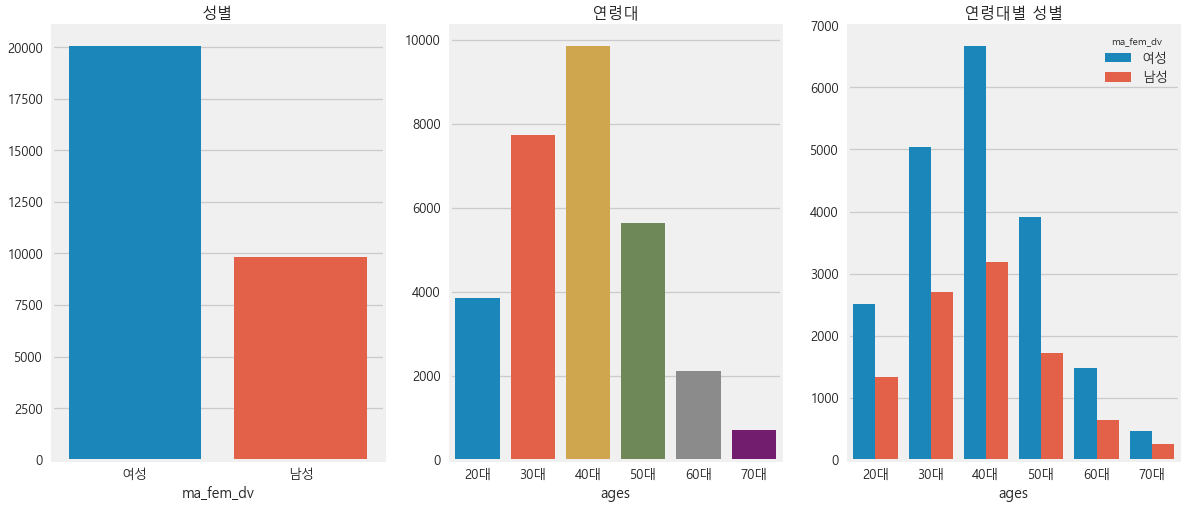

In [9]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
sns.countplot('ma_fem_dv', data=data1, ax=ax[0])
ax[0].set_title('성별')
ax[0].set_ylabel("")

sns.countplot('ages', data=data1, ax=ax[1],order=['20대','30대','40대','50대','60대','70대'])
ax[1].set_title('연령대')
ax[1].set_ylabel("")

sns.countplot('ages', hue='ma_fem_dv',data=data1,ax=ax[2],order=['20대','30대','40대','50대','60대','70대'])
ax[2].set_title('연령대별 성별') #제목설정
ax[2].set_ylabel('')
plt.show()

# Data4

In [10]:
data4.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [11]:
categorys = ['clac_hlv_nm', 'clac_mcls_nm', 'pd_nm']
for category in categorys:
    print(data4[category].value_counts())
    print('='*20)

패션잡화          130
축산물            91
수산물            88
스포츠패션          82
문구/사무용품        72
채소             72
유아동의류          67
과일             58
속옷/양말/홈웨어      56
조미료            51
화장품/뷰티케어       50
생활/주방가전        43
퍼스널케어          39
원예/애완          39
구기/필드스포츠       38
조리식품           38
식기/조리기구        36
과자             36
침구/수예          35
자동차용품          35
아웃도어/레저        34
건강식품           32
출산/육아용품        32
냉장식품           32
주방잡화           32
가구             31
완구             31
건해산물           30
청소/세탁/욕실용품     30
여성의류           29
대용식            29
세제/위생          28
영상/음향가전        27
남성의류           26
건강용품           25
음료             24
테넌트/음식점        22
주류             22
시즌스포츠          22
인테리어/조명        21
커피/차           20
냉동식품           20
헬스/피트니스        15
양곡             15
서적/음반/악기       15
공구/안전용품        15
계절가전           15
컴퓨터            14
병통조림           14
생활/렌탈서비스       13
냉장/세탁가전        12
상품권            10
유제품             9
기타(비상품)         7
담배              6
여행/레저서비스  

In [12]:
data4[data4['pd_nm']=='기타']

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
85,PD0086,기타,건강용품,일반의약외품
282,PD0283,기타,기타(비상품),기타


# Data5

In [13]:
data5.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [14]:
print('data5의 br_c 개수 :', len(data5.br_c.unique()))
print('data2,3에서 사용된 br_c 개수:', len(set(data2.br_c.unique()).union(set(data3.br_c.unique()))))
print('사용되지 않은 점포코드 :',set(data5.br_c.unique()) - set(data2.br_c.unique()).union(set(data3.br_c.unique())))

data5의 br_c 개수 : 8814
data2,3에서 사용된 br_c 개수: 8789
사용되지 않은 점포코드 : {'D020290', 'D010733', 'D010466', 'E010015', 'D020292', 'D020276', 'D011072', 'D020353', 'E010014', 'D011271', 'D020314', 'D020284', 'E010043', 'D020342', 'D020083', 'D020094', 'D020368', 'D020108', 'A041681', 'D020117', 'E010023', 'D020281', 'D020176', 'D020184', 'E010031'}


In [15]:
data5.groupby(['zon_hlv','zon_mcls'])[['zon_mcls']].count()

zon_mcls
zon_hlv zon_mcls          
Z00     Z00000           6
Z01     Z01001          57
        Z01002          11
        Z01003          13
        Z01004          10
...                    ...
Z17     Z17021          60
        Z17022          56
        Z17023          56
        Z17024          83
        Z17025          39

[258 rows x 1 columns]

In [16]:
data5.groupby('cop_c').count()['br_c']

cop_c
A01      67
A02     117
A03     488
A04    5646
A05     441
A06       1
B01      20
C01     140
C02       4
D01    1311
D02     535
E01      44
Name: br_c, dtype: int64

In [17]:
print(data5.zon_hlv.value_counts())
print(data1.zon_hlv.value_counts())

Z10    2141
Z17    1723
Z11     552
Z16     539
Z04     440
Z14     428
Z12     423
Z08     386
Z01     353
Z09     324
Z06     321
Z05     276
Z13     241
Z15     240
Z07     197
Z03     171
Z02      53
Z00       6
Name: zon_hlv, dtype: int64
Z10    8156
Z17    7879
Z16    2503
Z11    1840
Z04    1749
Z06    1080
Z14     988
Z13     896
Z12     803
Z08     739
Z15     677
Z09     642
Z03     600
Z05     576
Z01     474
Z07     204
Z02     103
Name: zon_hlv, dtype: int64


Text(0.5, 1.0, '유통제휴사별 지역 분포')

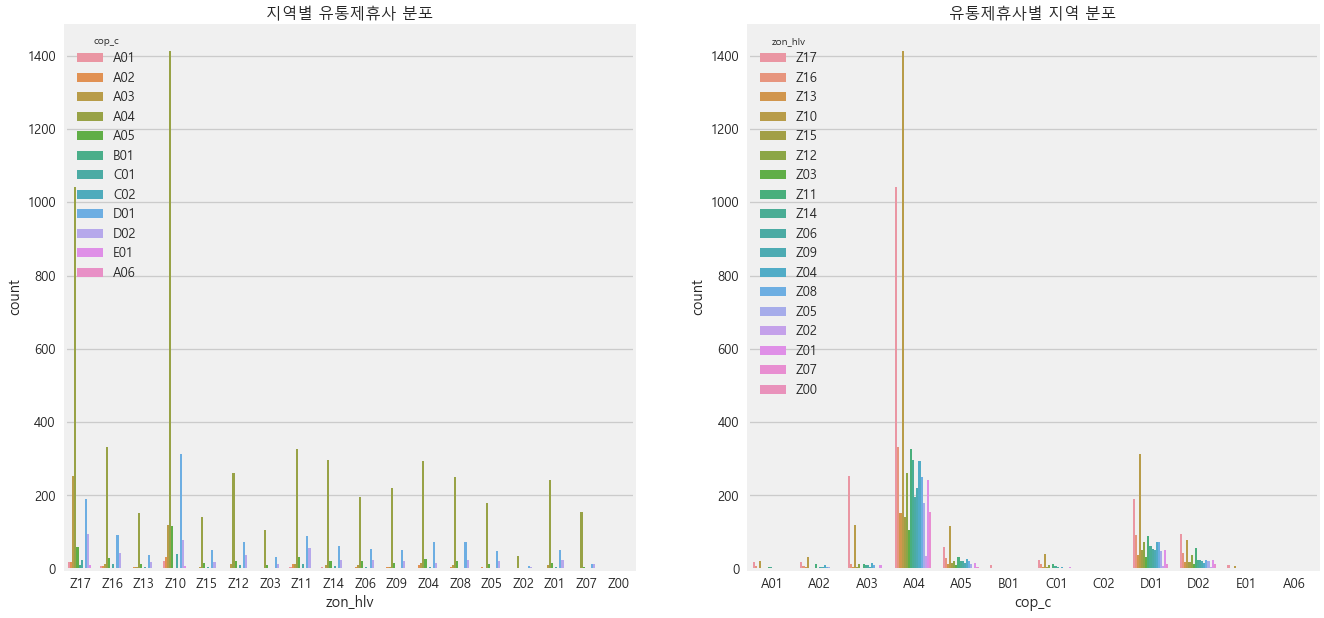

In [18]:
f, ax = plt.subplots(1,2,figsize=(20, 10))
sns.countplot(data = data5, x = 'zon_hlv',hue = "cop_c",ax=ax[0])
ax[0].set_title('지역별 유통제휴사 분포')

sns.countplot(data = data5, x = 'cop_c',hue = "zon_hlv",ax=ax[1])
ax[1].set_title('유통제휴사별 지역 분포')

# Data2

In [19]:
data2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,78000.0,2
1,M000034966,A01016688590,1,A01,A010045,PD0796,20210116,18,100.0,1
2,M000034966,A01016718167,1,A01,A010045,PD0816,20210116,18,62100.0,1
3,M000034966,A02357398521,1,A02,A020116,PD0616,20210325,13,17900.0,2
4,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,59700.0,3


Text(0.5, 1.0, '채널별 구매수량')

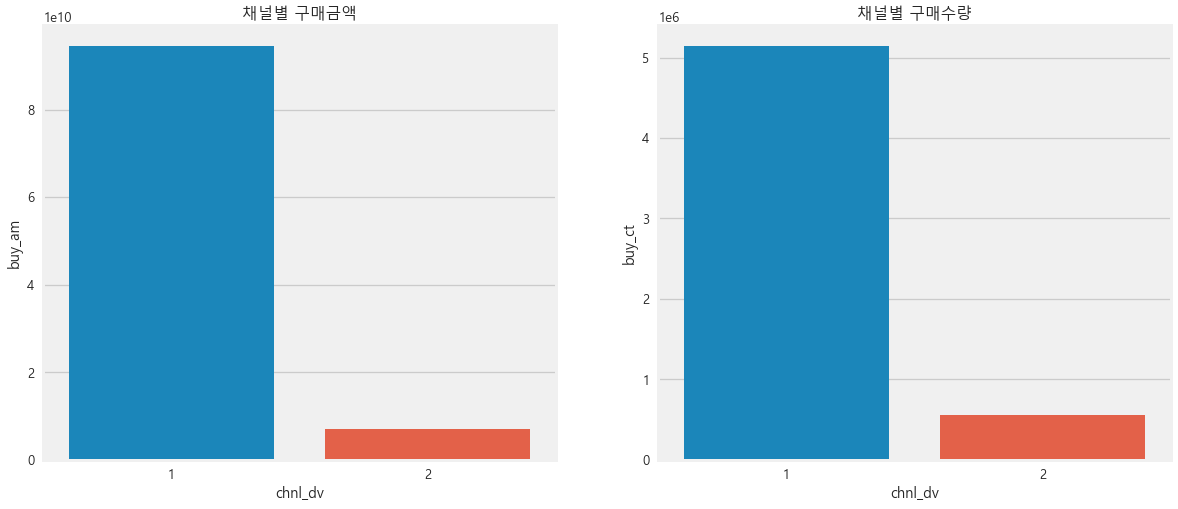

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='chnl_dv', y='buy_am', data=data2.groupby(['chnl_dv'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('채널별 구매금액')

sns.barplot(x='chnl_dv', y='buy_ct', data=data2.groupby(['chnl_dv'])[['buy_ct']].sum().reset_index(),ax=ax[1])
ax[1].set_title('채널별 구매수량')

Text(0.5, 1.0, '통합 유통사별 구매수량')

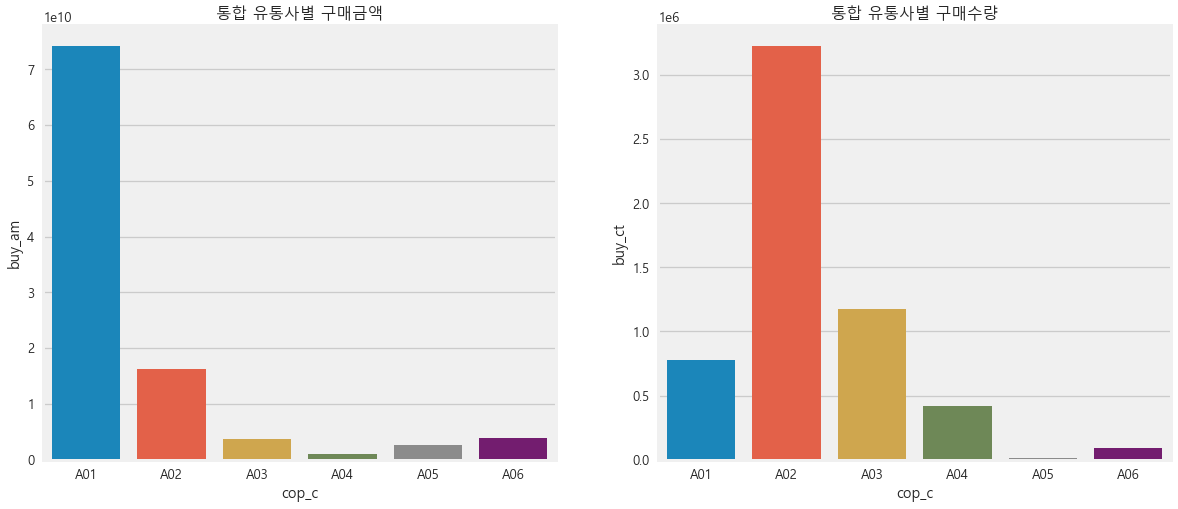

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='cop_c', y='buy_am', data=data2.groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('통합 유통사별 구매금액')

sns.barplot(x='cop_c', y='buy_ct', data=data2.groupby(['cop_c'])[['buy_ct']].sum().reset_index(),ax=ax[1])
ax[1].set_title('통합 유통사별 구매수량')

Text(0.5, 1.0, '온라인 유통사별 구매금액')

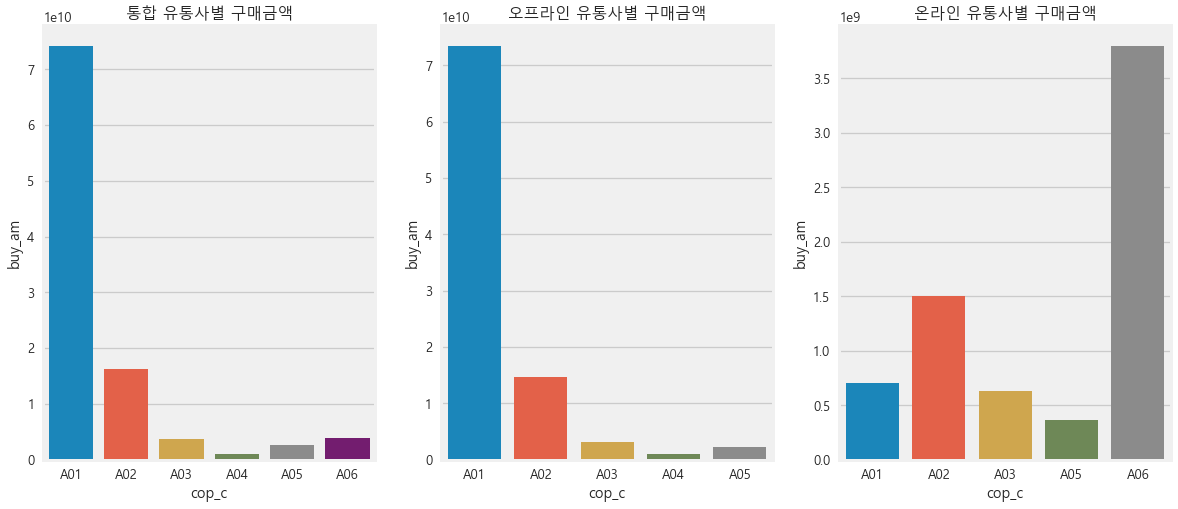

In [22]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
sns.barplot(x='cop_c', y='buy_am', data=data2.groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('통합 유통사별 구매금액')

sns.barplot(x='cop_c', y='buy_am', data=data2[data2['chnl_dv']==1].groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[1])
ax[1].set_title('오프라인 유통사별 구매금액')

sns.barplot(x='cop_c', y='buy_am', data=data2[data2['chnl_dv']==2].groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[2])
ax[2].set_title('온라인 유통사별 구매금액')

Text(0.5, 1.0, '온라인 점포별 구매수량')

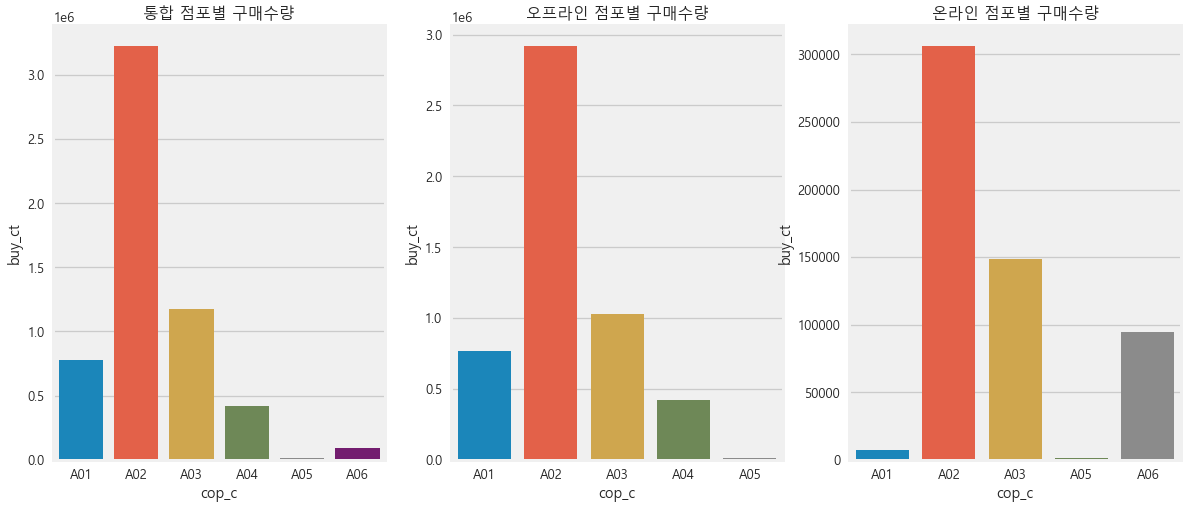

In [23]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
sns.barplot(x='cop_c', y='buy_ct', data=data2.groupby(['cop_c'])[['buy_ct']].sum().reset_index(),ax=ax[0])
ax[0].set_title('통합 점포별 구매수량')

sns.barplot(x='cop_c', y='buy_ct', data=data2[data2['chnl_dv']==1].groupby(['cop_c'])[['buy_ct']].sum().reset_index(),ax=ax[1])
ax[1].set_title('오프라인 점포별 구매수량')

sns.barplot(x='cop_c', y='buy_ct', data=data2[data2['chnl_dv']==2].groupby(['cop_c'])[['buy_ct']].sum().reset_index(),ax=ax[2])
ax[2].set_title('온라인 점포별 구매수량')

In [24]:
data2['de_dt']=pd.to_datetime(data2.de_dt.apply(str))
data2['de_dt']

0         2021-01-16
1         2021-01-16
2         2021-01-16
3         2021-03-25
4         2021-03-25
             ...    
3710270   2021-05-15
3710271   2021-01-13
3710272   2021-01-22
3710273   2021-04-06
3710274   2021-05-03
Name: de_dt, Length: 3710275, dtype: datetime64[ns]

Text(0.5, 1.0, '시간대별 구매수량')

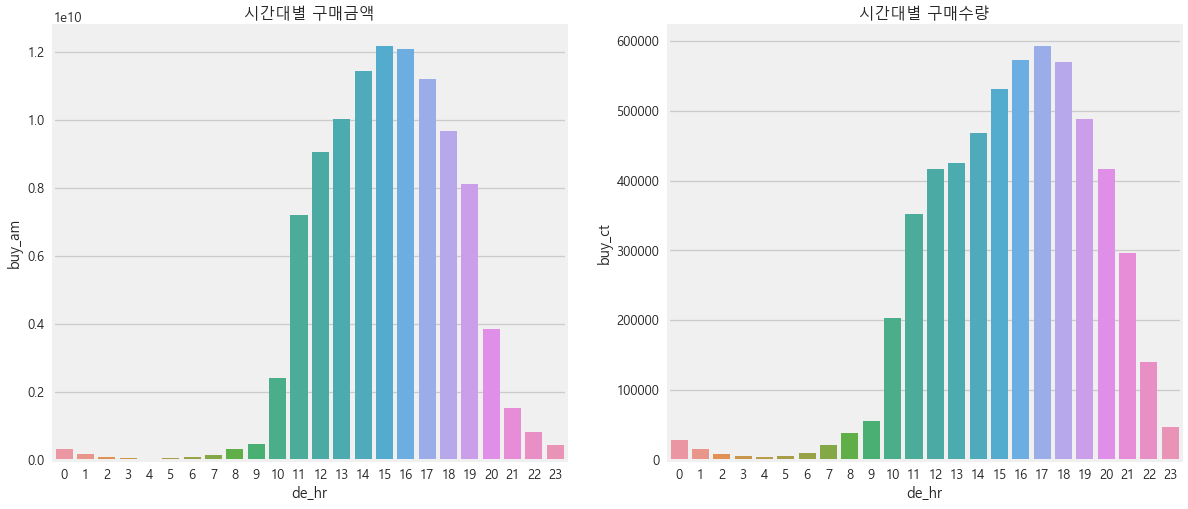

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='de_hr', y='buy_am', data=data2.groupby(['de_hr'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('시간대별 구매금액')

sns.barplot(x='de_hr', y='buy_ct', data=data2.groupby(['de_hr'])[['buy_ct']].sum().reset_index(),ax=ax[1])
ax[1].set_title('시간대별 구매수량')

In [26]:
data2['Year'] = data2['de_dt'].dt.year 
data2['Month'] = data2['de_dt'].dt.month 
data2['Day'] = data2['de_dt'].dt.day 
data2['Weekday'] = data2['de_dt'].dt.day_name()

Text(0.5, 1.0, '시간대별 구매수량')

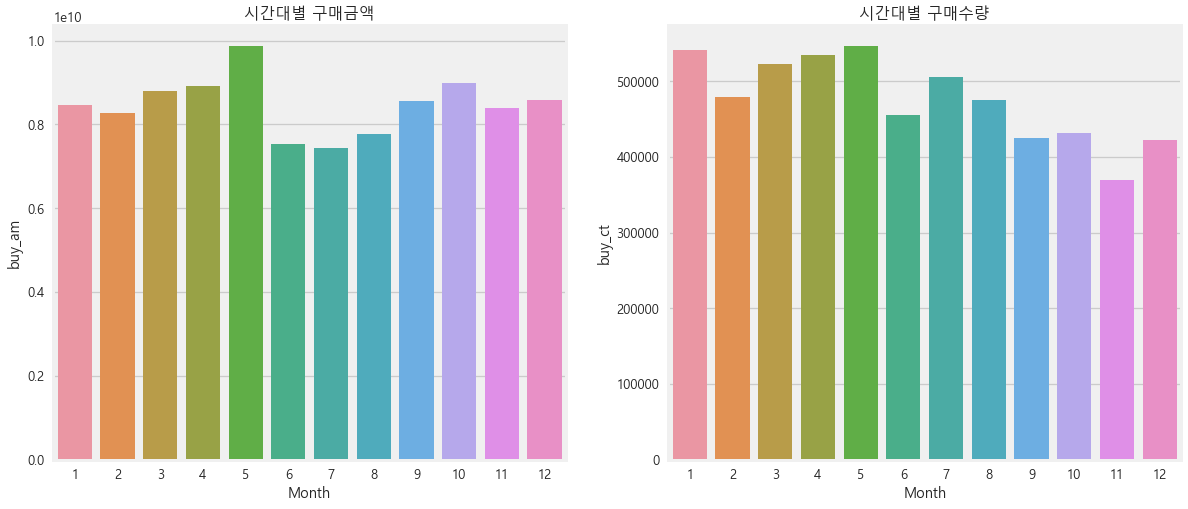

In [27]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='Month', y='buy_am', data=data2.groupby(['Month'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('시간대별 구매금액')

sns.barplot(x='Month', y='buy_ct', data=data2.groupby(['Month'])[['buy_ct']].sum().reset_index(),ax=ax[1])
ax[1].set_title('시간대별 구매수량')

Text(0.5, 1.0, '시간대별 구매수량')

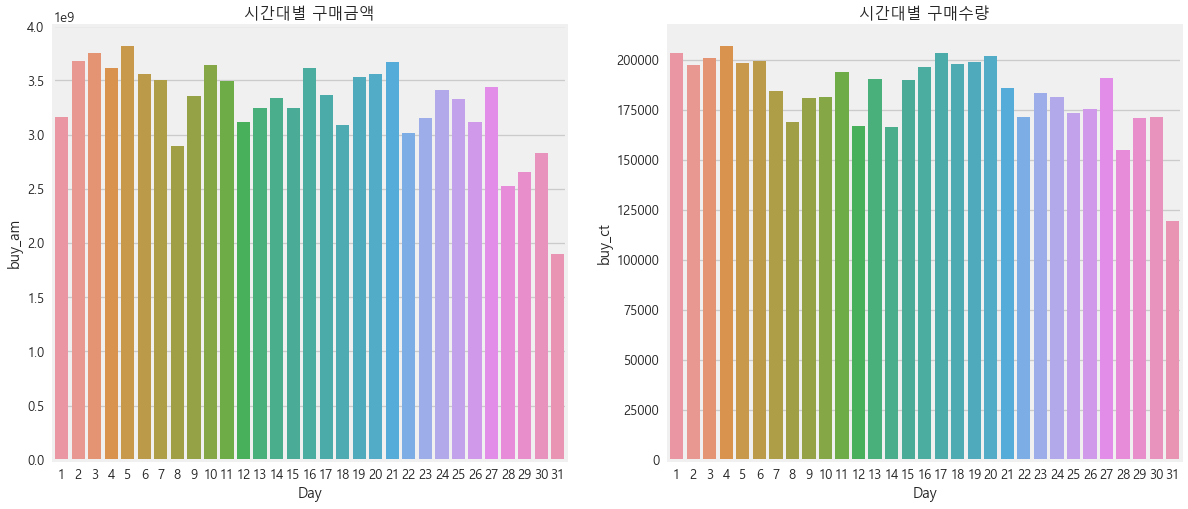

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='Day', y='buy_am', data=data2.groupby(['Day'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('시간대별 구매금액')

sns.barplot(x='Day', y='buy_ct', data=data2.groupby(['Day'])[['buy_ct']].sum().reset_index(),ax=ax[1])
ax[1].set_title('시간대별 구매수량')

Text(0.5, 1.0, '요일별 구매수량')

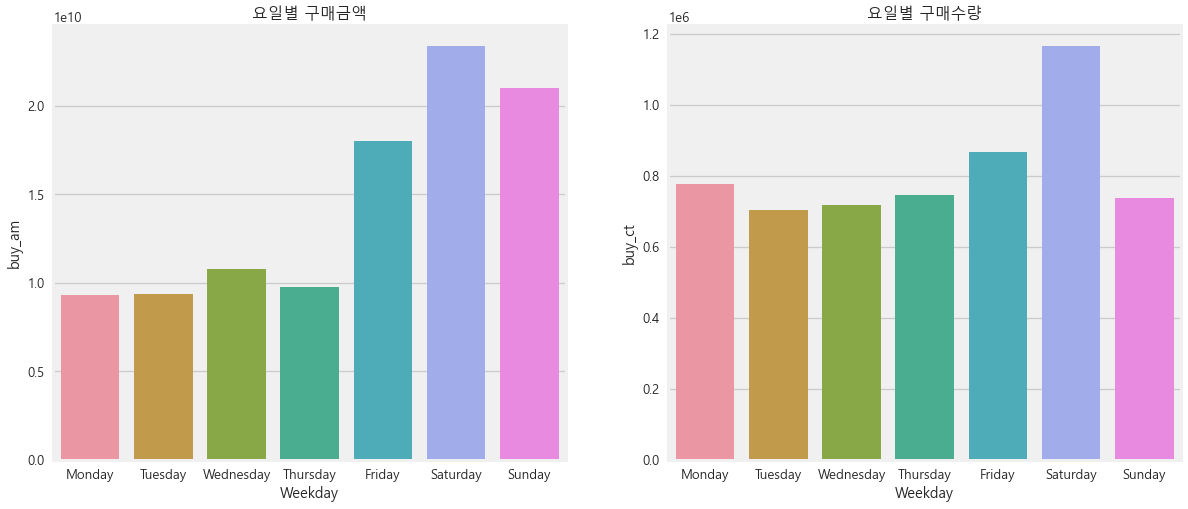

In [29]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='Weekday', y='buy_am', data=data2.groupby(['Weekday'])[['buy_am']].sum().reset_index(),ax=ax[0],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax[0].set_title('요일별 구매금액')

sns.barplot(x='Weekday', y='buy_ct', data=data2.groupby(['Weekday'])[['buy_ct']].sum().reset_index(),ax=ax[1],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax[1].set_title('요일별 구매수량')

Text(0.5, 1.0, '요일별 구매수량')

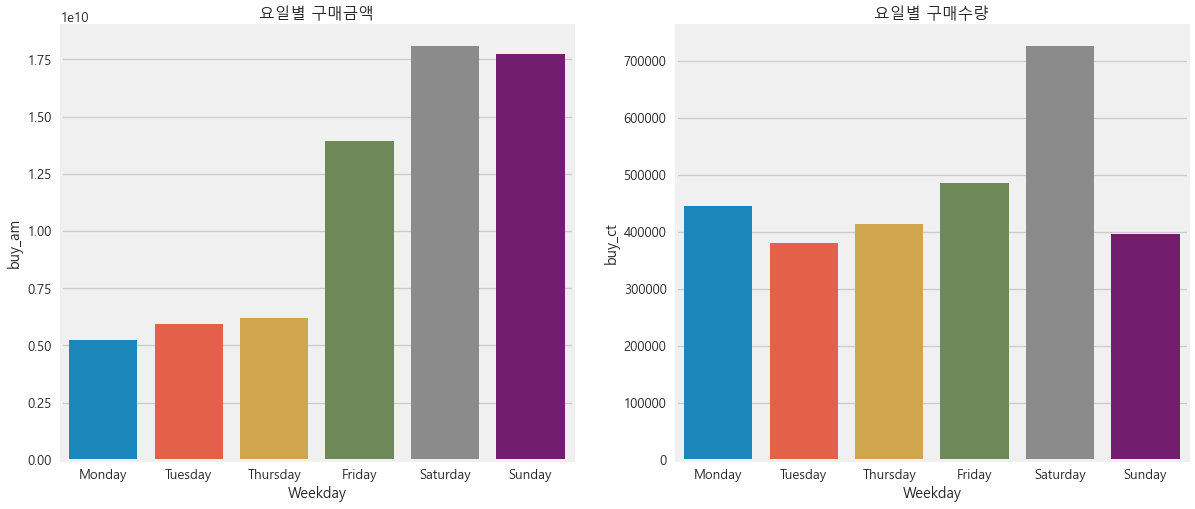

In [30]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='Weekday', y='buy_am', data=data2[data2['cop_c']=='A01'].groupby(['Weekday'])[['buy_am']].sum().reset_index(),ax=ax[0],order=['Monday','Tuesday','Thursday','Friday','Saturday','Sunday'])
ax[0].set_title('요일별 구매금액')

sns.barplot(x='Weekday', y='buy_ct', data=data2[data2['cop_c']=='A02'].groupby(['Weekday'])[['buy_ct']].sum().reset_index(),ax=ax[1],order=['Monday','Tuesday','Thursday','Friday','Saturday','Sunday'])
ax[1].set_title('요일별 구매수량')

# Data3

In [31]:
data3.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [32]:
data3['de_dt']=pd.to_datetime(data3.de_dt.apply(str)) #날짜 형태로 바꿈
data3['vst_dt']=pd.to_datetime(data3.de_dt.apply(str)) #날짜 형태로 바꿈

In [33]:
data3['Year'] = data3['de_dt'].dt.year 
data3['Month'] = data3['de_dt'].dt.month 
data3['Day'] = data3['de_dt'].dt.day 
data3['Weekday'] = data3['de_dt'].dt.day_name()

Text(0.5, 1.0, '요일별 구매금액')

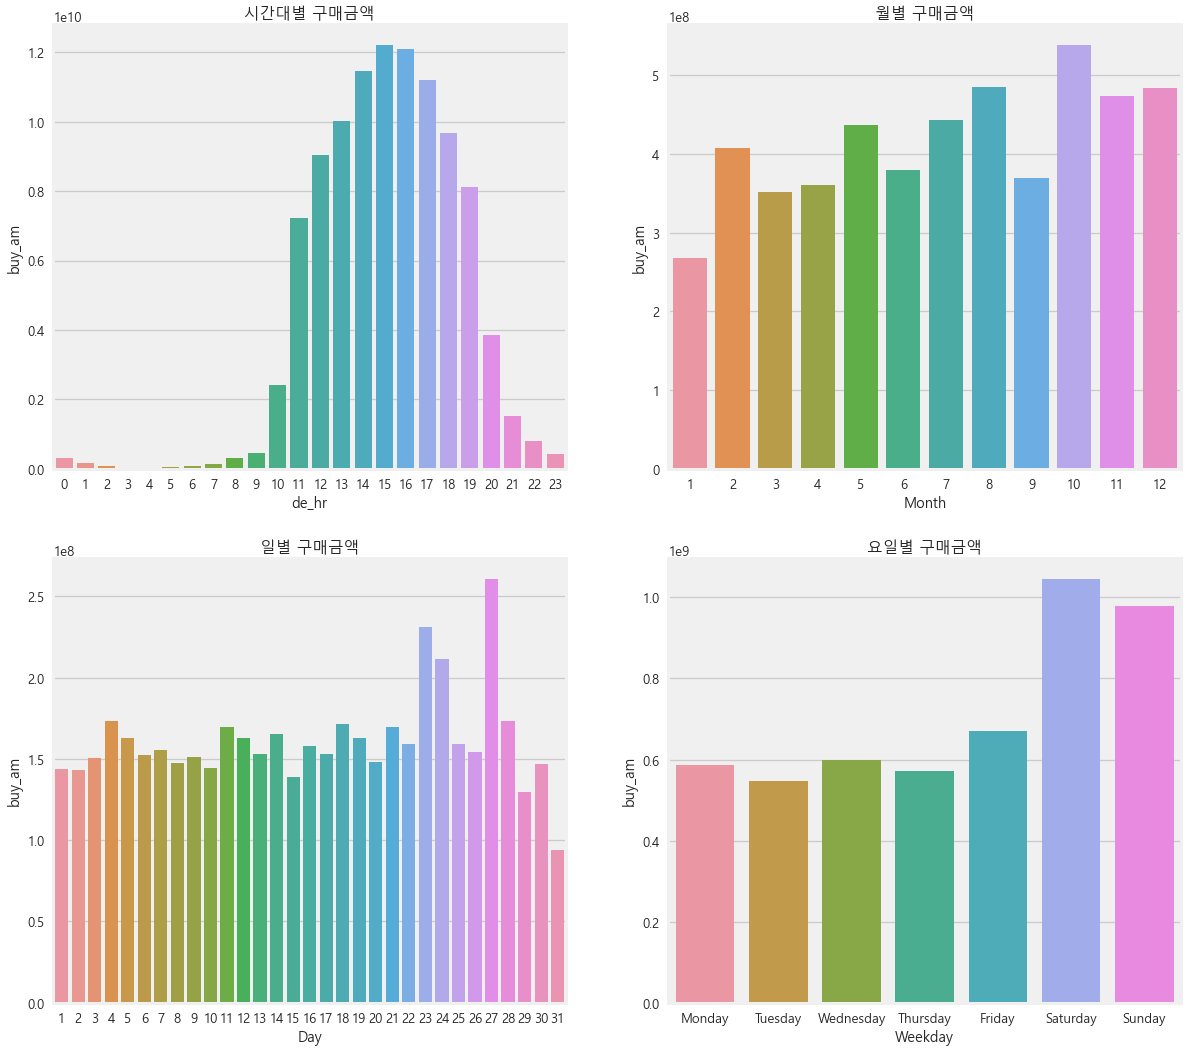

In [34]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))
sns.barplot(x='de_hr', y='buy_am', data=data2.groupby(['de_hr'])[['buy_am']].sum().reset_index(),ax=ax[0,0])
ax[0,0].set_title('시간대별 구매금액')

sns.barplot(x='Month', y='buy_am', data=data3.groupby(['Month'])[['buy_am']].sum().reset_index(),ax=ax[0,1])
ax[0,1].set_title('월별 구매금액')

sns.barplot(x='Day', y='buy_am', data=data3.groupby(['Day'])[['buy_am']].sum().reset_index(),ax=ax[1,0])
ax[1,0].set_title('일별 구매금액')

sns.barplot(x='Weekday', y='buy_am', data=data3.groupby(['Weekday'])[['buy_am']].sum().reset_index(),ax=ax[1,1],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax[1,1].set_title('요일별 구매금액')

# Data6

In [35]:
data6.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


Text(0.5, 1.0, '채널별 구매금액')

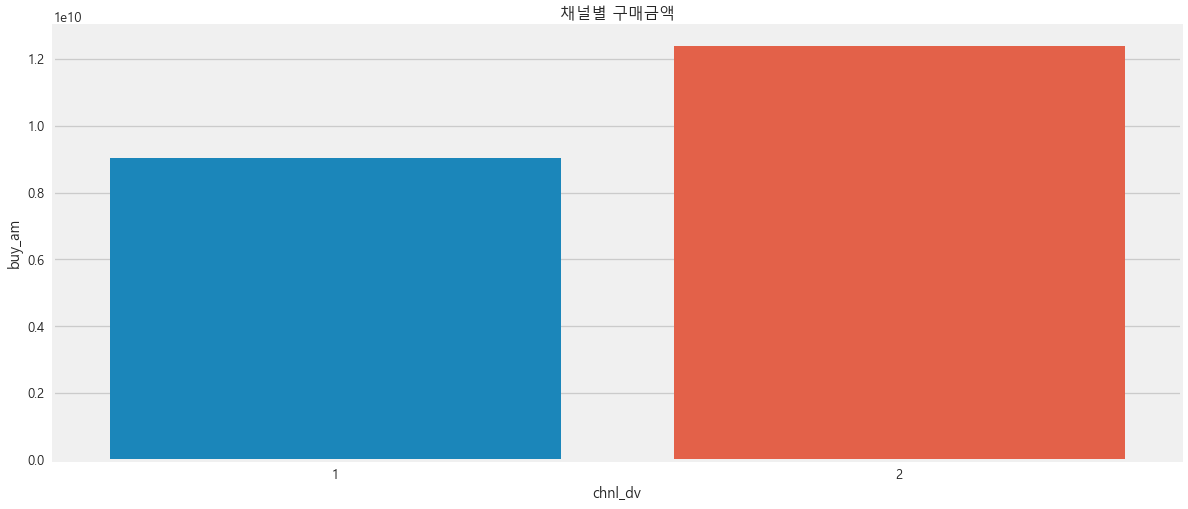

In [36]:
f, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x='chnl_dv', y='buy_am', data=data6.groupby(['chnl_dv'])[['buy_am']].sum().reset_index())
ax.set_title('채널별 구매금액')

Text(0.5, 1.0, '온라인 유통사별 구매금액')

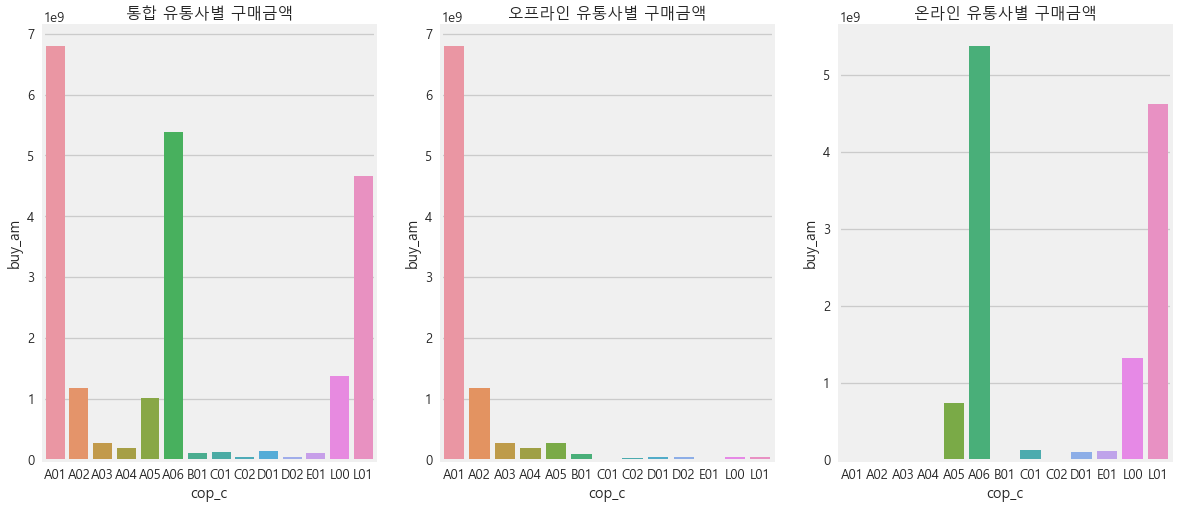

In [37]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
sns.barplot(x='cop_c', y='buy_am', data=data6.groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('통합 유통사별 구매금액')

sns.barplot(x='cop_c', y='buy_am', data=data6[data6['chnl_dv']==1].groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[1])
ax[1].set_title('오프라인 유통사별 구매금액')

sns.barplot(x='cop_c', y='buy_am', data=data6[data6['chnl_dv']==2].groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[2])
ax[2].set_title('온라인 유통사별 구매금액')

In [38]:
data6['de_dt']=pd.to_datetime(data6.de_dt.apply(str)) #날짜 형태로 바꿈

In [39]:
data6['Year'] = data6['de_dt'].dt.year 
data6['Month'] = data6['de_dt'].dt.month 
data6['Day'] = data6['de_dt'].dt.day 
data6['Weekday'] = data6['de_dt'].dt.day_name()

Text(0.5, 1.0, '요일별 구매금액')

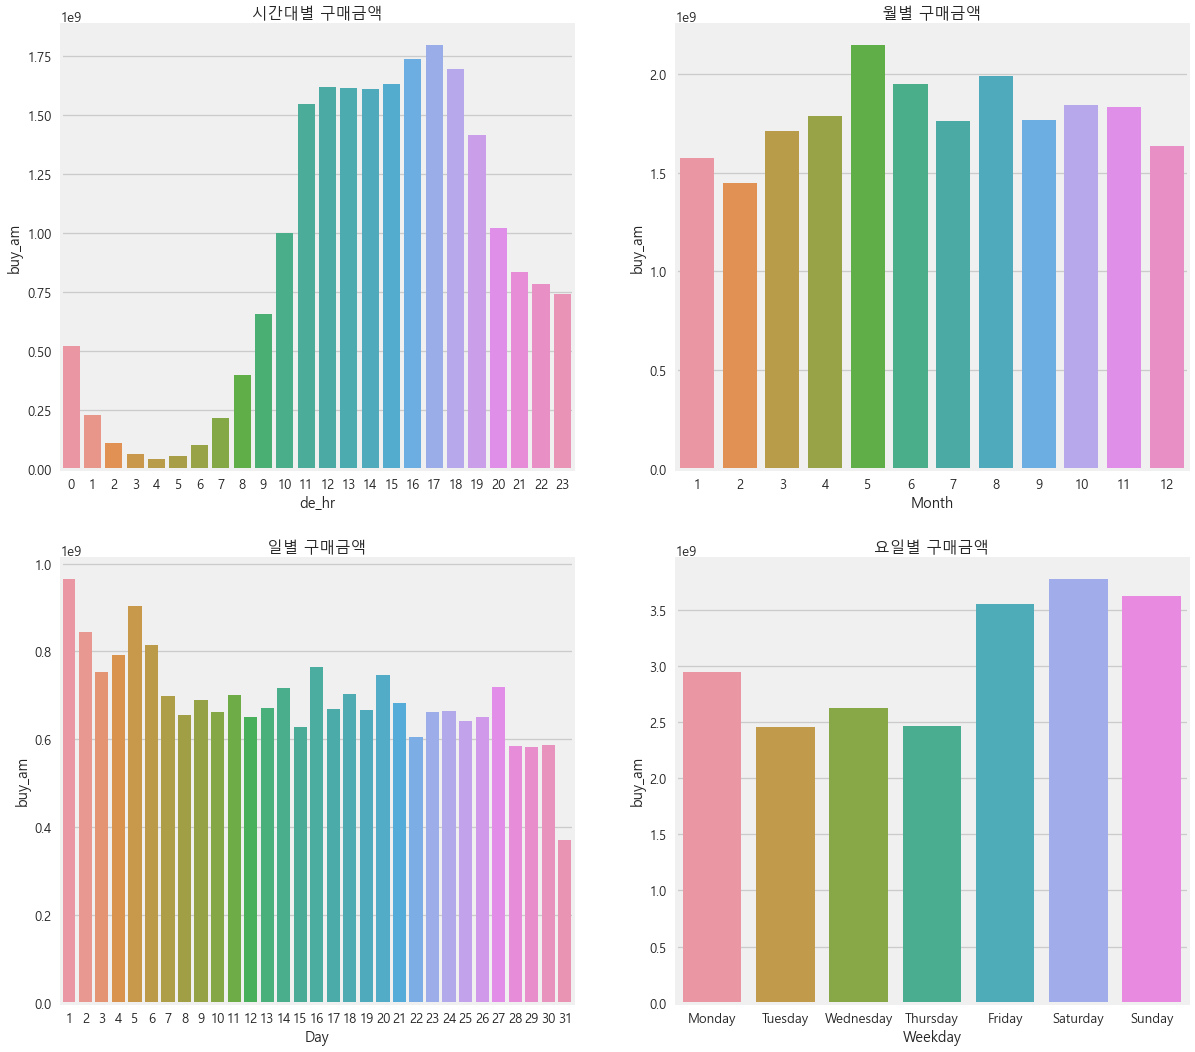

In [40]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))
sns.barplot(x='de_hr', y='buy_am', data=data6.groupby(['de_hr'])[['buy_am']].sum().reset_index(),ax=ax[0,0])
ax[0,0].set_title('시간대별 구매금액')

sns.barplot(x='Month', y='buy_am', data=data6.groupby(['Month'])[['buy_am']].sum().reset_index(),ax=ax[0,1])
ax[0,1].set_title('월별 구매금액')

sns.barplot(x='Day', y='buy_am', data=data6.groupby(['Day'])[['buy_am']].sum().reset_index(),ax=ax[1,0])
ax[1,0].set_title('일별 구매금액')

sns.barplot(x='Weekday', y='buy_am', data=data6.groupby(['Weekday'])[['buy_am']].sum().reset_index(),ax=ax[1,1],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax[1,1].set_title('요일별 구매금액')

# Data2 + Data4

In [41]:
df24 = pd.merge(data2,data4, how='outer',on='pd_c')
df24.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,Year,Month,Day,Weekday,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M000034966,A01016688590,1.0,A01,A010045,PD0777,2021-01-16,18.0,78000.0,2.0,2021.0,1.0,16.0,Saturday,남성런닝/트레이닝화,스포츠패션,남성스포츠화
1,M000136117,A01294575336,1.0,A01,A010018,PD0777,2021-08-05,15.0,239000.0,1.0,2021.0,8.0,5.0,Thursday,남성런닝/트레이닝화,스포츠패션,남성스포츠화
2,M000261625,A01117216600,1.0,A01,A010017,PD0777,2021-04-03,13.0,179000.0,1.0,2021.0,4.0,3.0,Saturday,남성런닝/트레이닝화,스포츠패션,남성스포츠화
3,M000419293,A02041463489,1.0,A02,A020008,PD0777,2021-01-29,14.0,3500.0,8.0,2021.0,1.0,29.0,Friday,남성런닝/트레이닝화,스포츠패션,남성스포츠화
4,M000508243,A01417352264,1.0,A01,A010032,PD0777,2021-10-31,18.0,49000.0,1.0,2021.0,10.0,31.0,Sunday,남성런닝/트레이닝화,스포츠패션,남성스포츠화


Text(0.5, 1.0, '상품 대분류별 구매수량')

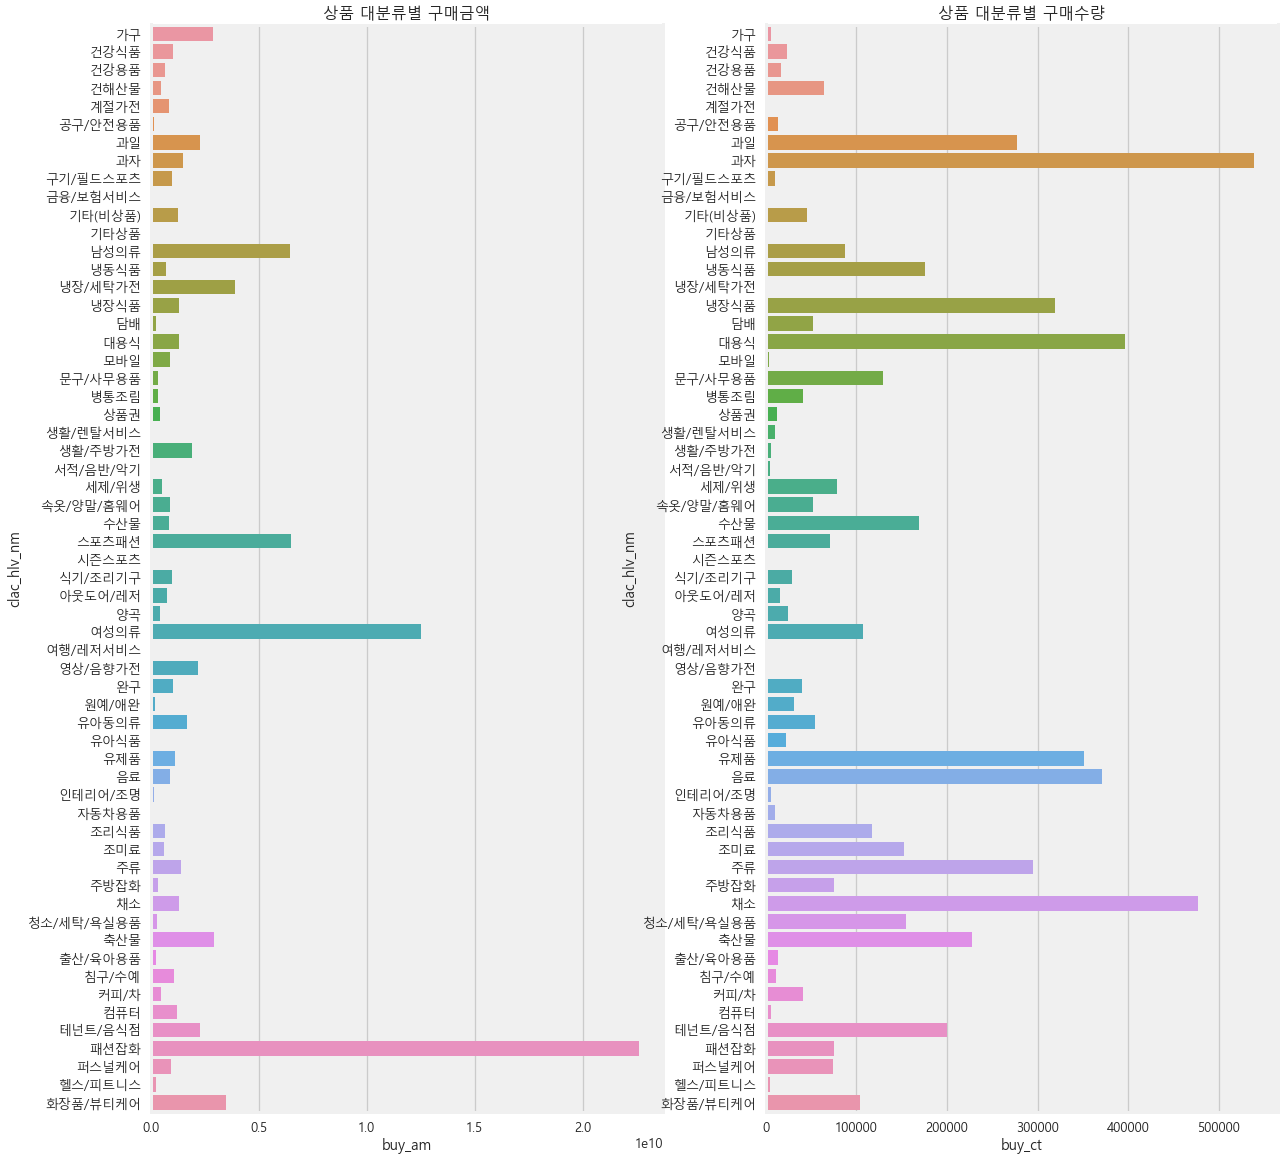

In [42]:
f, ax = plt.subplots(1, 2,figsize=(18, 20))
sns.barplot(x='buy_am', y='clac_hlv_nm', data=df24.groupby(['clac_hlv_nm'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('상품 대분류별 구매금액')

sns.barplot(x='buy_ct', y='clac_hlv_nm', data=df24.groupby(['clac_hlv_nm'])[['buy_ct']].sum().reset_index(),ax=ax[1])
ax[1].set_title('상품 대분류별 구매수량')

Text(0.5, 1.0, 'A06 상품 대분류별 구매금액')

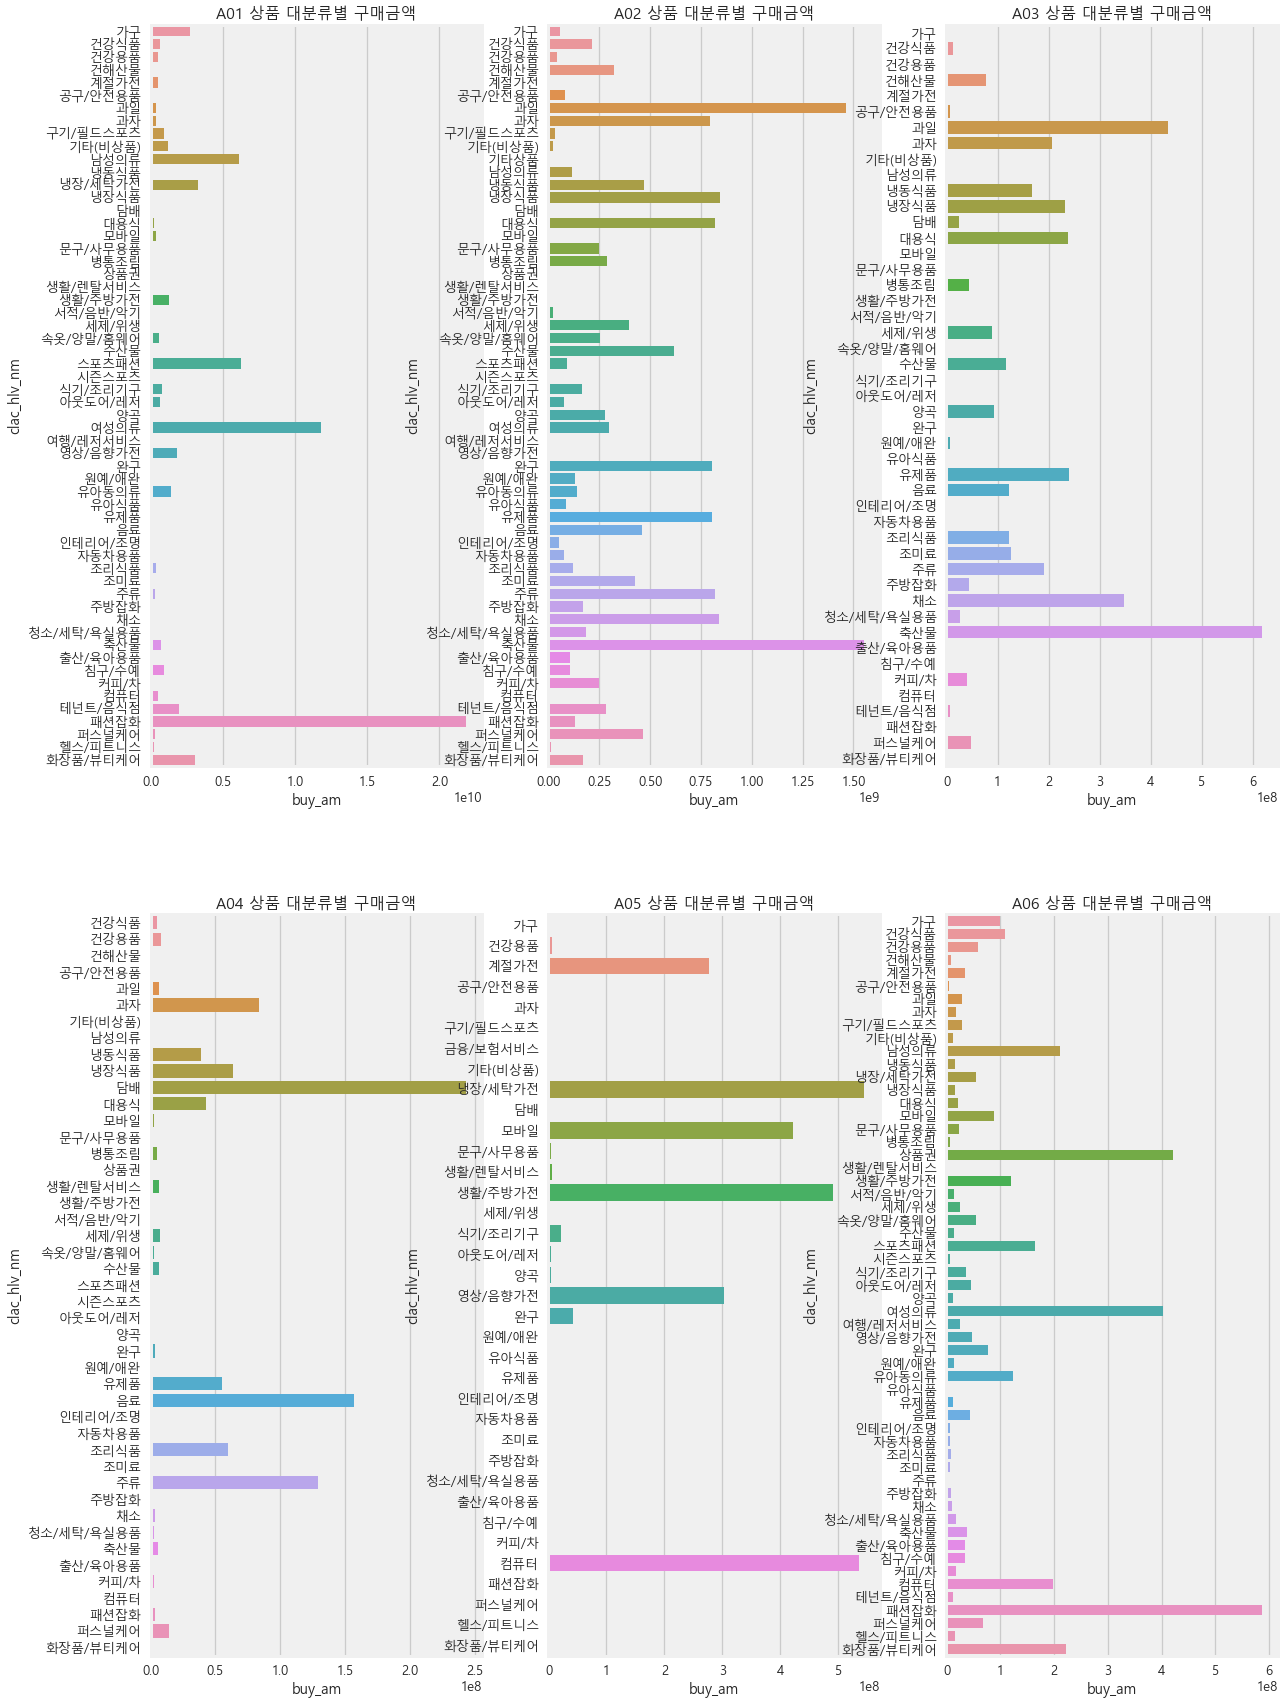

In [43]:
f, ax = plt.subplots(2, 3,figsize=(18, 30))
sns.barplot(x='buy_am', y='clac_hlv_nm', data=df24[df24['cop_c']=='A01'].groupby(['clac_hlv_nm'])[['buy_am']].sum().reset_index(),ax=ax[0,0])
ax[0,0].set_title('A01 상품 대분류별 구매금액')

sns.barplot(x='buy_am', y='clac_hlv_nm', data=df24[df24['cop_c']=='A02'].groupby(['clac_hlv_nm'])[['buy_am']].sum().reset_index(),ax=ax[0,1])
ax[0,1].set_title('A02 상품 대분류별 구매금액')

sns.barplot(x='buy_am', y='clac_hlv_nm', data=df24[df24['cop_c']=='A03'].groupby(['clac_hlv_nm'])[['buy_am']].sum().reset_index(),ax=ax[0,2])
ax[0,2].set_title('A03 상품 대분류별 구매금액')

sns.barplot(x='buy_am', y='clac_hlv_nm', data=df24[df24['cop_c']=='A04'].groupby(['clac_hlv_nm'])[['buy_am']].sum().reset_index(),ax=ax[1,0])
ax[1,0].set_title('A04 상품 대분류별 구매금액')

sns.barplot(x='buy_am', y='clac_hlv_nm', data=df24[df24['cop_c']=='A05'].groupby(['clac_hlv_nm'])[['buy_am']].sum().reset_index(),ax=ax[1,1])
ax[1,1].set_title('A05 상품 대분류별 구매금액')

sns.barplot(x='buy_am', y='clac_hlv_nm', data=df24[df24['cop_c']=='A06'].groupby(['clac_hlv_nm'])[['buy_am']].sum().reset_index(),ax=ax[1,2])
ax[1,2].set_title('A06 상품 대분류별 구매금액')

Text(0.5, 1.0, 'A06 상품 대분류별 구매수량')

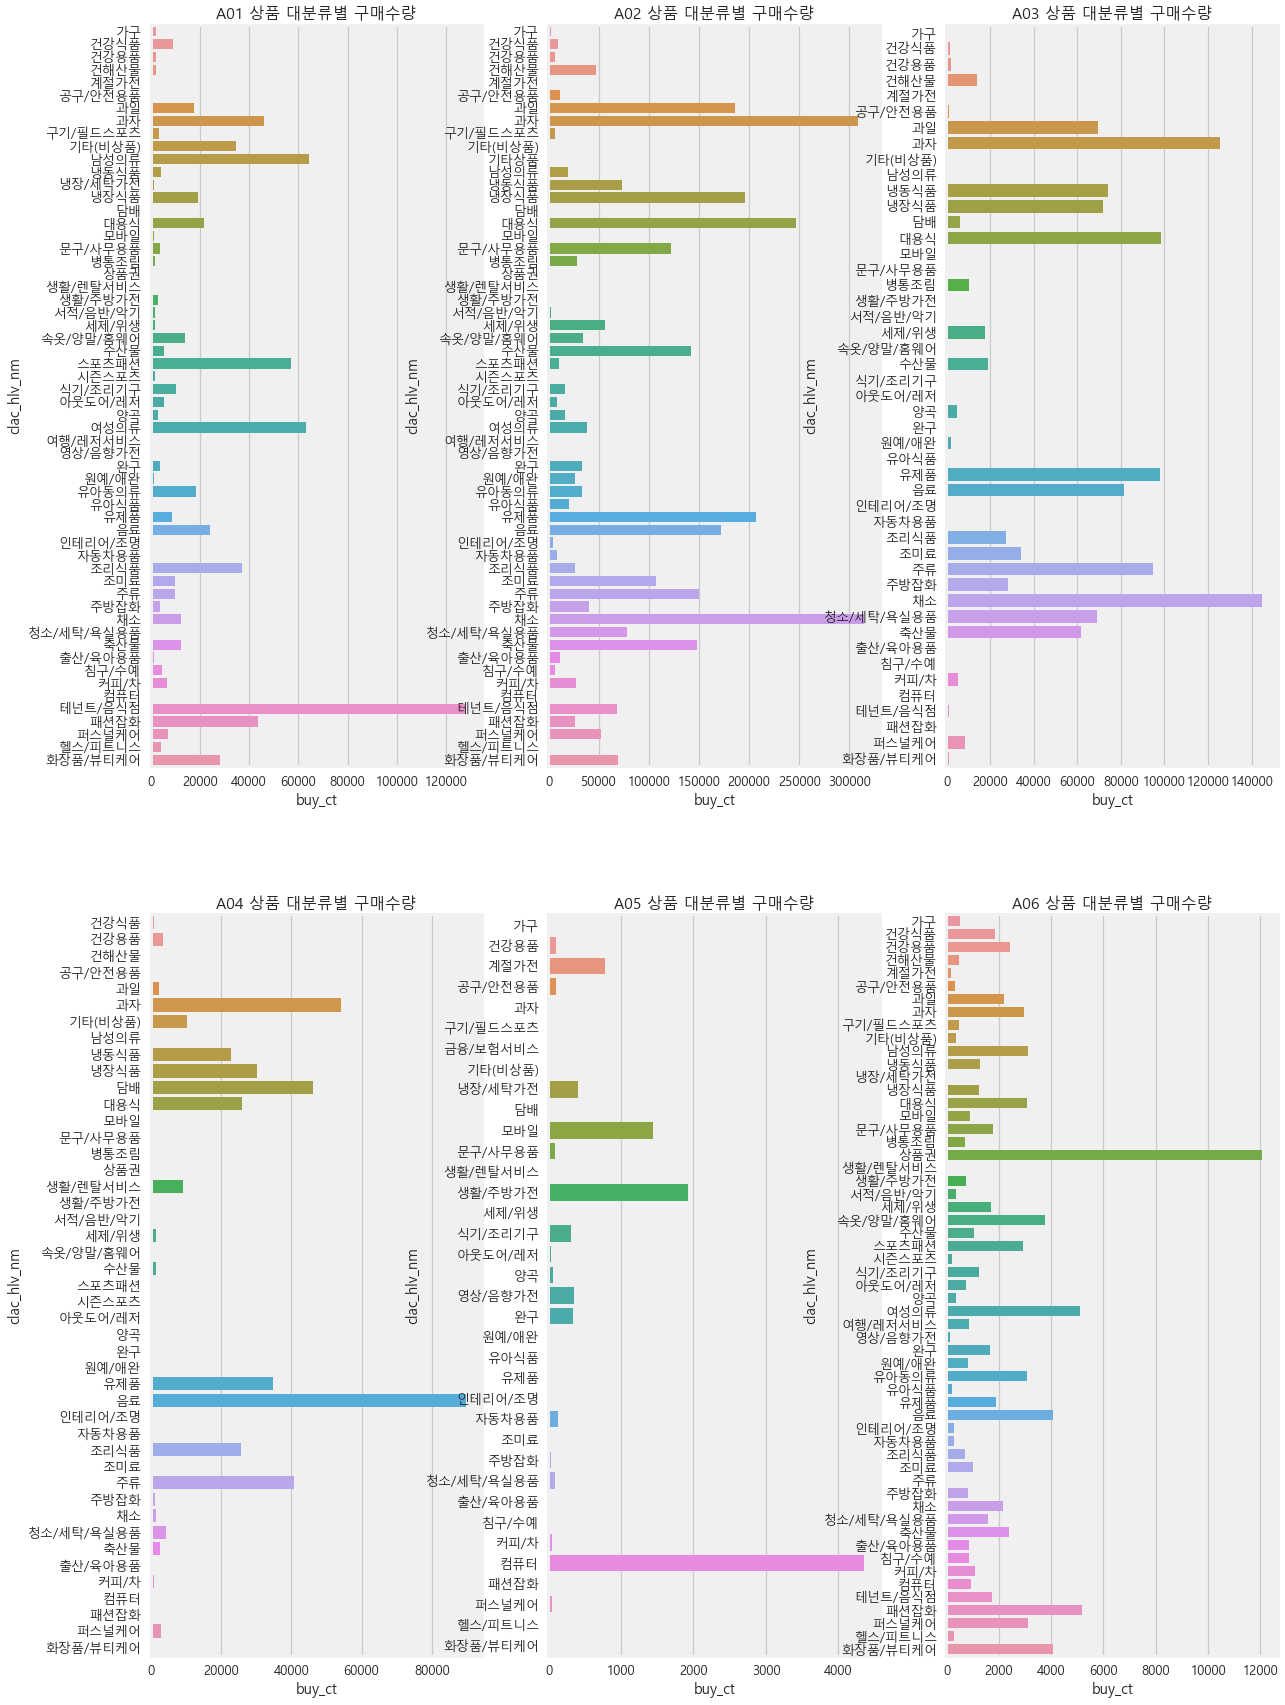

In [44]:
f, ax = plt.subplots(2, 3,figsize=(18, 30))
sns.barplot(x='buy_ct', y='clac_hlv_nm', data=df24[df24['cop_c']=='A01'].groupby(['clac_hlv_nm'])[['buy_ct']].sum().reset_index(),ax=ax[0,0])
ax[0,0].set_title('A01 상품 대분류별 구매수량')

sns.barplot(x='buy_ct', y='clac_hlv_nm', data=df24[df24['cop_c']=='A02'].groupby(['clac_hlv_nm'])[['buy_ct']].sum().reset_index(),ax=ax[0,1])
ax[0,1].set_title('A02 상품 대분류별 구매수량')

sns.barplot(x='buy_ct', y='clac_hlv_nm', data=df24[df24['cop_c']=='A03'].groupby(['clac_hlv_nm'])[['buy_ct']].sum().reset_index(),ax=ax[0,2])
ax[0,2].set_title('A03 상품 대분류별 구매수량')

sns.barplot(x='buy_ct', y='clac_hlv_nm', data=df24[df24['cop_c']=='A04'].groupby(['clac_hlv_nm'])[['buy_ct']].sum().reset_index(),ax=ax[1,0])
ax[1,0].set_title('A04 상품 대분류별 구매수량')

sns.barplot(x='buy_ct', y='clac_hlv_nm', data=df24[df24['cop_c']=='A05'].groupby(['clac_hlv_nm'])[['buy_ct']].sum().reset_index(),ax=ax[1,1])
ax[1,1].set_title('A05 상품 대분류별 구매수량')

sns.barplot(x='buy_ct', y='clac_hlv_nm', data=df24[df24['cop_c']=='A06'].groupby(['clac_hlv_nm'])[['buy_ct']].sum().reset_index(),ax=ax[1,2])
ax[1,2].set_title('A06 상품 대분류별 구매수량')

# Data2 + Data5

In [45]:
df25 = pd.merge(data2,data5, how='left',on=['br_c','cop_c'])
df25.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,Year,Month,Day,Weekday,zon_hlv,zon_mcls
0,M000034966,A01016688590,1,A01,A010045,PD0777,2021-01-16,18,78000.0,2,2021,1,16,Saturday,Z16,Z16003
1,M000034966,A01016688590,1,A01,A010045,PD0796,2021-01-16,18,100.0,1,2021,1,16,Saturday,Z16,Z16003
2,M000034966,A01016718167,1,A01,A010045,PD0816,2021-01-16,18,62100.0,1,2021,1,16,Saturday,Z16,Z16003
3,M000034966,A02357398521,1,A02,A020116,PD0616,2021-03-25,13,17900.0,2,2021,3,25,Thursday,Z07,Z07002
4,M000034966,A02357398521,1,A02,A020116,PD0630,2021-03-25,13,59700.0,3,2021,3,25,Thursday,Z07,Z07002


Text(0.5, 1.0, '지역별 구매금액(제휴사만)')

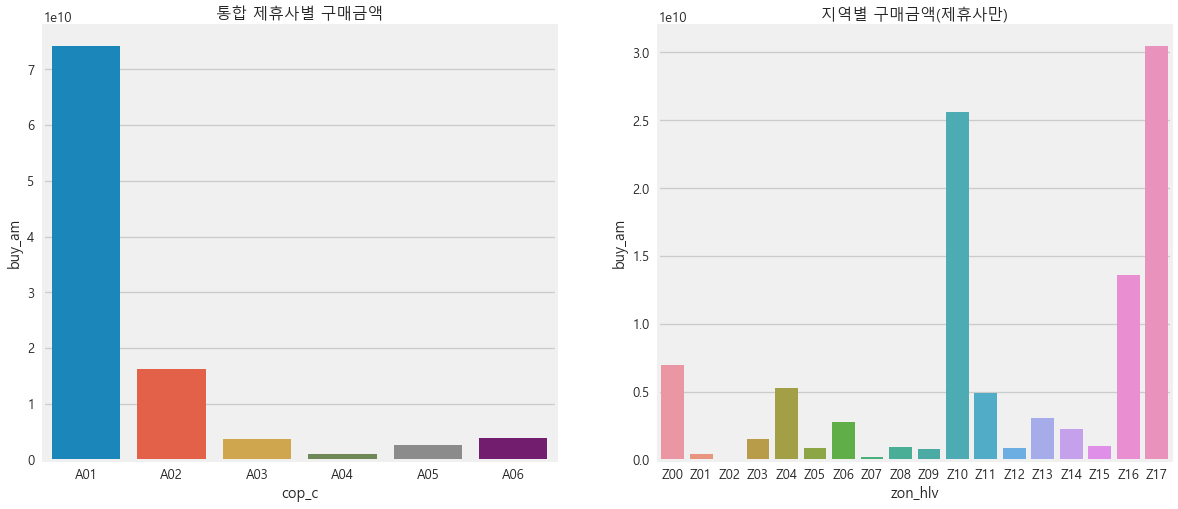

In [46]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='cop_c', y='buy_am', data=data2.groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('통합 제휴사별 구매금액')

sns.barplot(x='zon_hlv', y='buy_am', data=df25.groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[1])
ax[1].set_title('지역별 구매금액(제휴사만)')

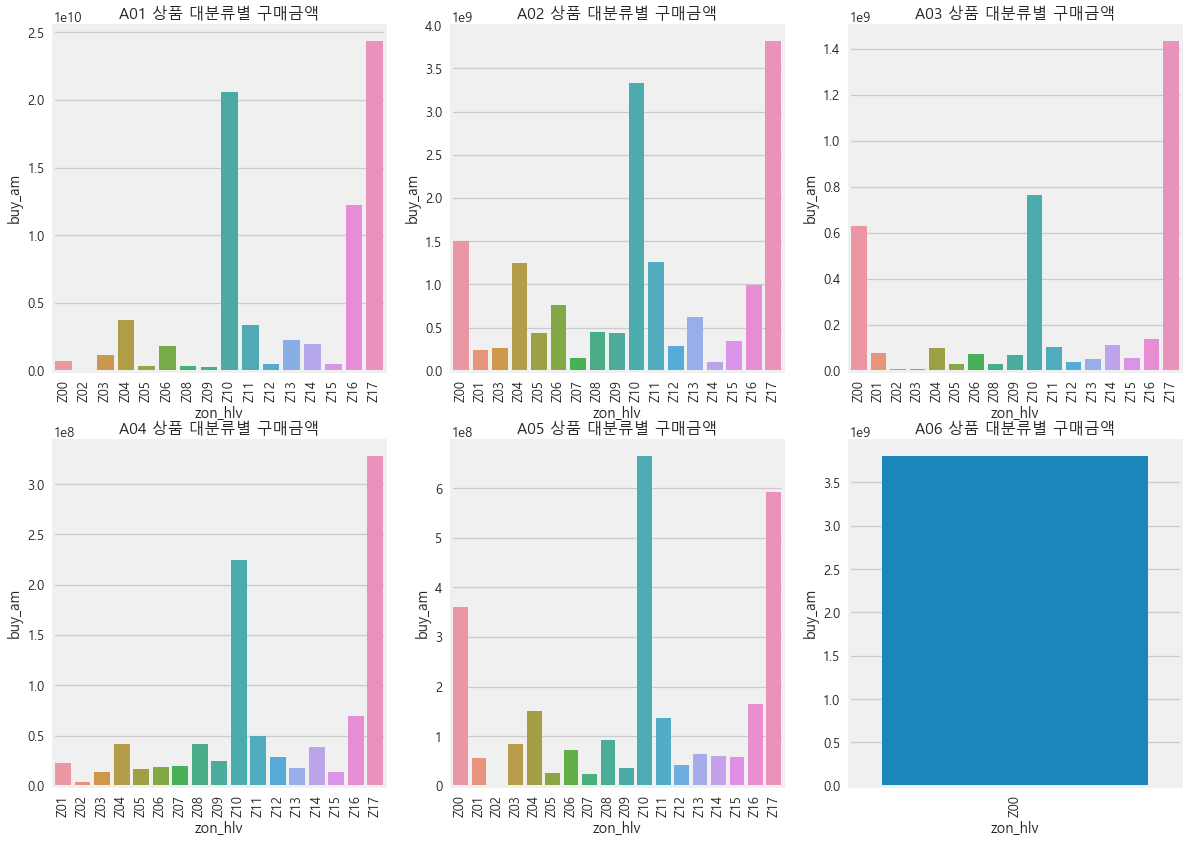

In [47]:
f, ax = plt.subplots(2,3,figsize=(18, 14))
sns.barplot(x='zon_hlv', y='buy_am', data=df25[df25['cop_c']=='A01'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[0,0])
ax[0,0].set_title('A01 상품 대분류별 구매금액')
ax[0,0].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df25[df25['cop_c']=='A02'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[0,1])
ax[0,1].set_title('A02 상품 대분류별 구매금액')
ax[0,1].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df25[df25['cop_c']=='A03'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[0,2])
ax[0,2].set_title('A03 상품 대분류별 구매금액')
ax[0,2].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df25[df25['cop_c']=='A04'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[1,0])
ax[1,0].set_title('A04 상품 대분류별 구매금액')
ax[1,0].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df25[df25['cop_c']=='A05'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[1,1])
ax[1,1].set_title('A05 상품 대분류별 구매금액')
ax[1,1].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df25[df25['cop_c']=='A06'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[1,2])
ax[1,2].set_title('A06 상품 대분류별 구매금액')
ax[1,2].tick_params(axis='x', rotation=90)

# Data3 + Data5

In [48]:
df35 = pd.merge(data3,data5, how='left',on=['br_c','cop_c'])
df35.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,Year,Month,Day,Weekday,zon_hlv,zon_mcls
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,2021-10-26,12,60000,2021,10,26,Tuesday,Z17,Z17024
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,2021-11-06,10,17100,2021,11,6,Saturday,Z17,Z17024
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,2021-02-11,12,136500,2021,2,11,Thursday,Z17,Z17024
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,2021-09-20,10,34200,2021,9,20,Monday,Z17,Z17024
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,2021-10-10,9,2500,2021,10,10,Sunday,Z17,Z17018


Text(0.5, 1.0, '지역별 구매금액(제휴사만)')

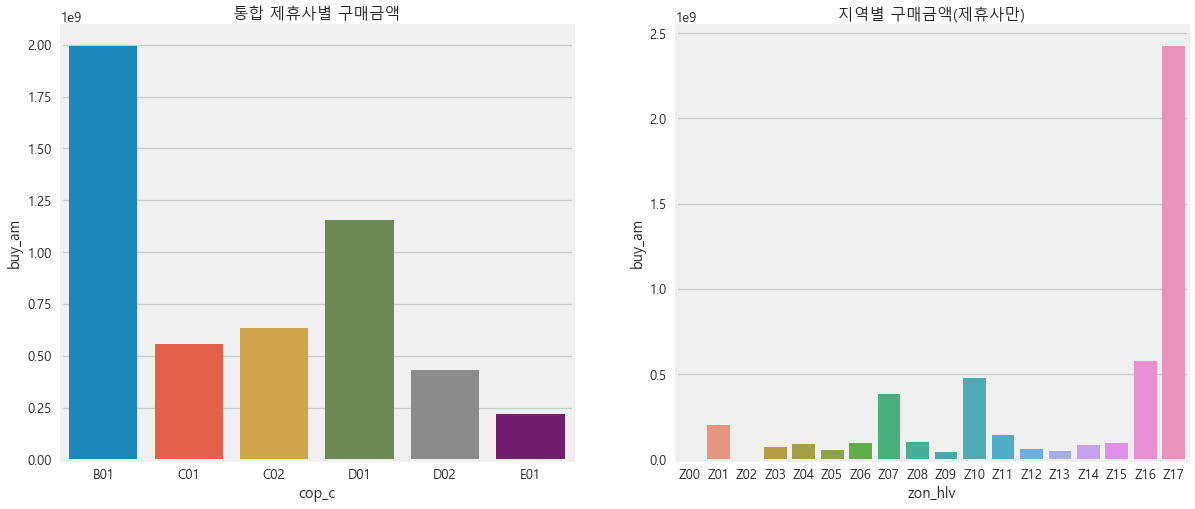

In [49]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='cop_c', y='buy_am', data=data3.groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('통합 제휴사별 구매금액')

sns.barplot(x='zon_hlv', y='buy_am', data=df35.groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[1])
ax[1].set_title('지역별 구매금액(제휴사만)')

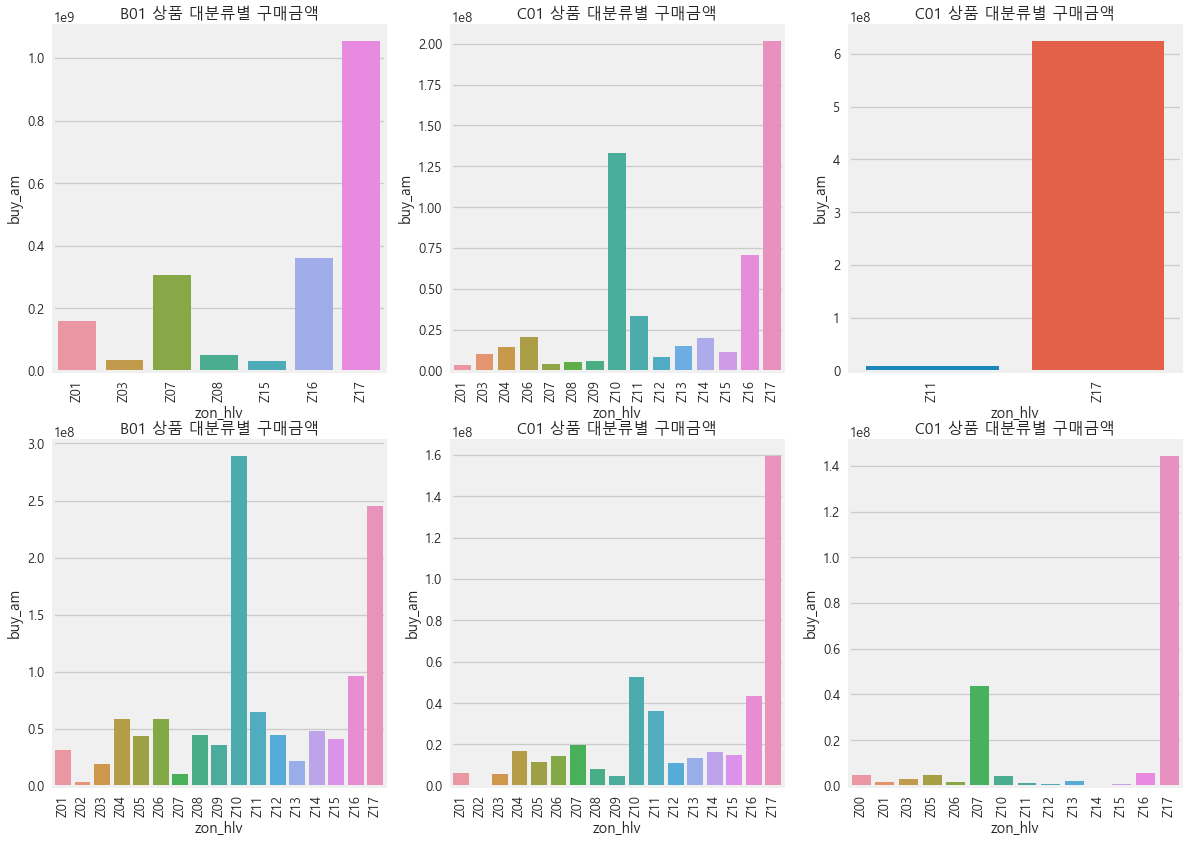

In [50]:
f, ax = plt.subplots(2,3,figsize=(18, 14))
sns.barplot(x='zon_hlv', y='buy_am', data=df35[df35['cop_c']=='B01'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[0,0])
ax[0,0].set_title('B01 상품 대분류별 구매금액')
ax[0,0].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df35[df35['cop_c']=='C01'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[0,1])
ax[0,1].set_title('C01 상품 대분류별 구매금액')
ax[0,1].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df35[df35['cop_c']=='C02'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[0,2])
ax[0,2].set_title('C01 상품 대분류별 구매금액')
ax[0,2].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df35[df35['cop_c']=='D01'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[1,0])
ax[1,0].set_title('B01 상품 대분류별 구매금액')
ax[1,0].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df35[df35['cop_c']=='D02'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[1,1])
ax[1,1].set_title('C01 상품 대분류별 구매금액')
ax[1,1].tick_params(axis='x', rotation=90)

sns.barplot(x='zon_hlv', y='buy_am', data=df35[df35['cop_c']=='E01'].groupby(['zon_hlv'])[['buy_am']].sum().reset_index(),ax=ax[1,2])
ax[1,2].set_title('C01 상품 대분류별 구매금액')
ax[1,2].tick_params(axis='x', rotation=90)

# Data6 / Data2 + Data3

In [51]:
Lpay=data6.groupby(['cop_c'])[['buy_am']].sum().reset_index()
Lpay['mark']='엘포인트O'

In [52]:
pay1=data2.groupby(['cop_c'])[['buy_am']].sum().reset_index()
pay2=data3.groupby(['cop_c'])[['buy_am']].sum().reset_index()
pay3=pd.concat([pay1,pay2])
not_Lpay=pay3.append({'cop_c':'L00','buy_am':0},ignore_index=True)
not_Lpay=pay3.append({'cop_c':'L01','buy_am':0},ignore_index=True)
not_Lpay['mark']='엘포인트X'

In [53]:
MoneyAmount=pd.concat([Lpay,not_Lpay])
MoneyAmount

,cop_c,buy_am,mark
0,A01,6.805312e+09,엘포인트O
1,A02,1.182662e+09,엘포인트O
2,A03,2.797863e+08,엘포인트O
3,A04,1.870208e+08,엘포인트O
4,A05,1.011834e+09,엘포인트O
5,A06,5.377310e+09,엘포인트O
6,B01,1.054811e+08,엘포인트O
7,C01,1.341409e+08,엘포인트O
8,C02,3.821660e+07,엘포인트O
9,D01,1.415944e+08,엘포인트O


Text(0.5, 1.0, '통합 유통사별 LPOINT가 아닌 구매금액')

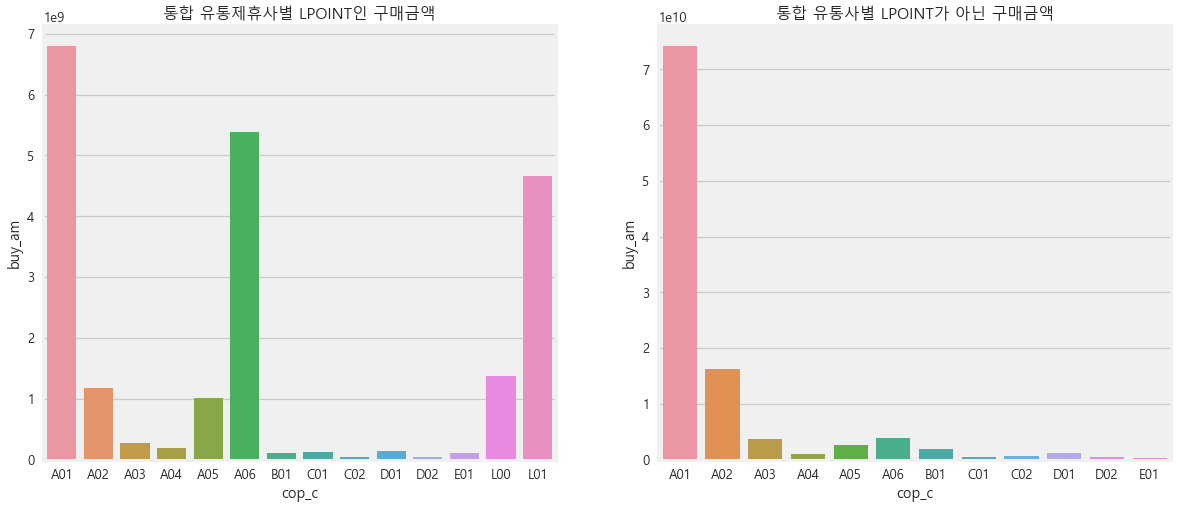

In [54]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='cop_c', y='buy_am', data=data6.groupby(['cop_c'])[['buy_am']].sum().reset_index(),ax=ax[0])
ax[0].set_title('통합 유통제휴사별 LPOINT인 구매금액')

sns.barplot(x='cop_c', y='buy_am', data=pay3,ax=ax[1])
ax[1].set_title('통합 유통사별 LPOINT가 아닌 구매금액')

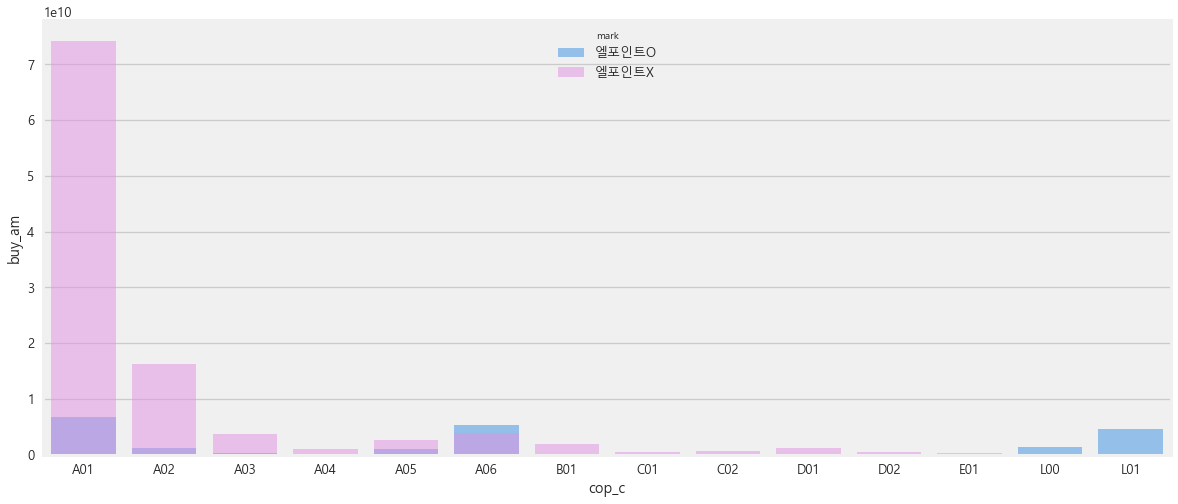

In [55]:
f, ax = plt.subplots(figsize=(18, 8))
ax = sns.barplot(data = MoneyAmount, x = "cop_c",hue = "mark",y='buy_am', palette=['dodgerblue','violet'],dodge=False,alpha=0.5)
plt.show()